In [1]:
import pandas as pd 

In [6]:
purchase_df = pd.read_csv("Purchase_behaviour.csv")

In [11]:

purchase_df.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [12]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
transaction_df = pd.read_csv("transaction_data.csv")

In [9]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [14]:
df = pd.merge(transaction_df, purchase_df, on='LYLTY_CARD_NBR', how='inner')


In [16]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#1. Identify top 3 most profitable products

In [17]:
top_products = df.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()
top_products = top_products.sort_values(by='TOT_SALES', ascending=False).head(3)
print("\nTop 3 Most Profitable Products:")
print(top_products)


Top 3 Most Profitable Products:
    PROD_NBR  TOT_SALES
3          4    40352.0
13        14    36367.6
15        16    34804.2


#2. Define loyalty: High total spend & frequent purchases

In [19]:
customer_loyalty = df.groupby('LYLTY_CARD_NBR').agg({
    'TOT_SALES': 'sum',
    'TXN_ID': 'count'
}).reset_index()

customer_loyalty.rename(columns={'TXN_ID': 'purchase_count'}, inplace=True)
loyal_customers = customer_loyalty.sort_values(by=['TOT_SALES', 'purchase_count'], ascending=False).head(10)
print("\nTop 10 Loyal Customers:")
print(loyal_customers)


Top 10 Loyal Customers:
       LYLTY_CARD_NBR  TOT_SALES  purchase_count
59694          226000    1300.00               2
60925          230078     138.60              17
17292           63197     132.80              15
69017          259009     127.20              15
42813          162039     126.80              18
16001           58361     124.80              14
61001          230154     124.40              14
25958           94185     122.80              16
35338          130090     122.65              14
47959          179228     120.80              16


#3. Profile loyal customers by demographics

In [20]:
loyal_customers_details = df[df['LYLTY_CARD_NBR'].isin(loyal_customers['LYLTY_CARD_NBR'])]
customer_profile = loyal_customers_details.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().reset_index(name='count')
print("\nLoyal Customer Segments:")
print(customer_profile)


Loyal Customer Segments:
               LIFESTAGE PREMIUM_CUSTOMER  count
0         OLDER FAMILIES           Budget     46
1         OLDER FAMILIES       Mainstream     18
2         OLDER FAMILIES          Premium      2
3  OLDER SINGLES/COUPLES       Mainstream     15
4         YOUNG FAMILIES           Budget     44
5         YOUNG FAMILIES          Premium     16


#4. Visualization of top products

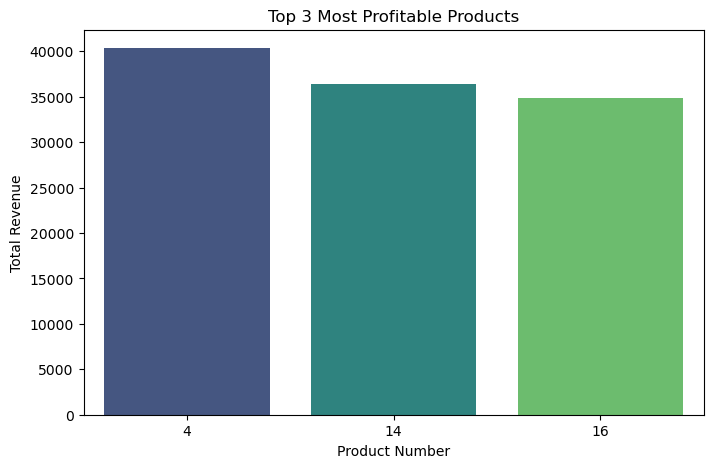

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='PROD_NBR', y='TOT_SALES', data=top_products, palette='viridis')
plt.xlabel("Product Number")
plt.ylabel("Total Revenue")
plt.title("Top 3 Most Profitable Products")
plt.show()

#5. Visualization of customer profile

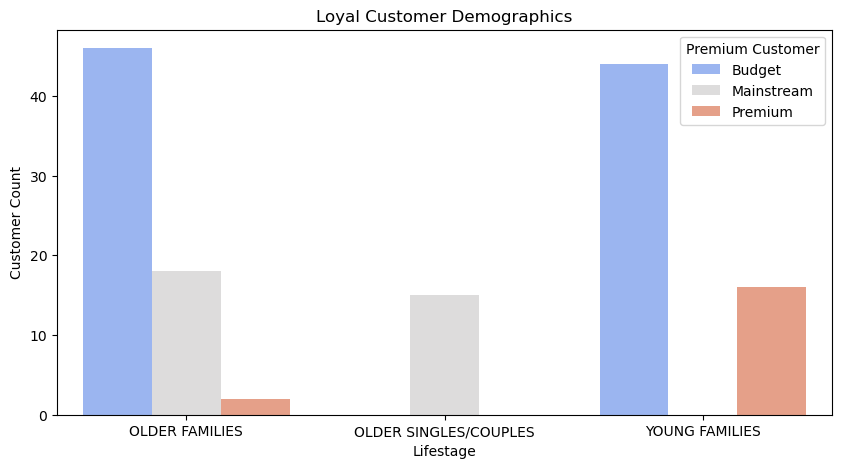

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='LIFESTAGE', y='count', hue='PREMIUM_CUSTOMER', data=customer_profile, palette='coolwarm')
plt.xlabel("Lifestage")
plt.ylabel("Customer Count")
plt.title("Loyal Customer Demographics")
plt.legend(title="Premium Customer")
plt.show()

#6. Hypothesis

In [23]:
hypothesis = "Loyal customers tend to be in certain lifestages and are often premium customers. \nThey likely have higher disposable income, allowing them to make frequent purchases."
print("\nHypothesis:")
print(hypothesis)


Hypothesis:
Loyal customers tend to be in certain lifestages and are often premium customers. 
They likely have higher disposable income, allowing them to make frequent purchases.
